### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [54]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

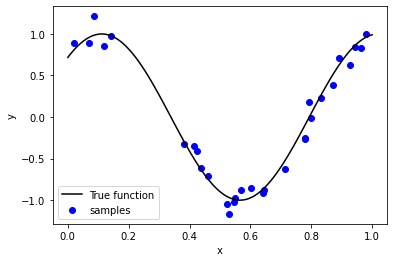

In [63]:
# Define the function to generate data points
def model(x):
    return np.sin((2.2*np.pi*x) + 0.8)

# Initialize random seed
np.random.seed(0)

# Generate noisy data points: (x,y)
n_samples = 30
train_x = np.sort(np.random.rand(n_samples))
train_y = model(train_x) + np.random.randn(n_samples) * 0.1


test_x = np.linspace(0, 1, 100)
# Plot true model and sampled data points
plt.figure()
plt.scatter(train_x, train_y, c='b', label='samples')
plt.plot(test_x, model(test_x), c='k', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

w:  [0.06038093894619001, -0.19787027099625887]


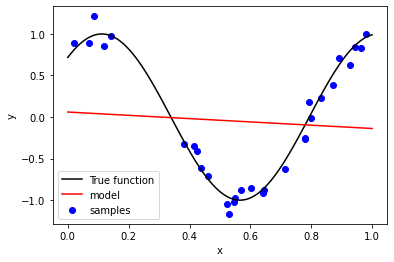

In [64]:
# Fit a linear model in the original space
model_linear = LinearRegression()
model_linear.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))
w0 = model_linear.intercept_[0]
w1 = model_linear.coef_[0][0]

# Plot fitted linear model
plt.figure()
plt.scatter(train_x, train_y, c='b', label='samples')
plt.plot(test_x, model(test_x), c='k', label='True function')
plt.plot(test_x, model_linear.predict(test_x.reshape(-1,1)), c='r', label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

w = [w0, w1]
print("w: ", w)

## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

In [65]:
# Augment the original feature to a 15-vector
X = train_x
for i in range(2, 16):
    X = np.vstack((X, np.power(train_x, i)))


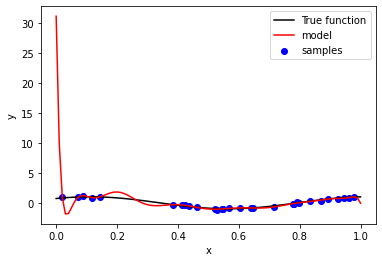

In [66]:
# Fit linear model to the generated 15-vector features
model_degree = LinearRegression()
model_degree.fit(X.T, train_y)

test_X = test_x
for i in range(2, 16):
    test_X = np.vstack((test_X, np.power(test_x, i)))
# Plot fitted curve and sampled data points
plt.figure()
plt.scatter(train_x, train_y, c='b', label='samples')
plt.plot(test_x, model(test_x), c='k', label='True function')
plt.plot(test_x, model_degree.predict(test_X.T), c='r', label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

/home/tito/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02063625723760909, tolerance: 0.00175155385437781
  model = cd_fast.enet_coordinate_descent(


w:  [  1.06843622   0.2167843  -14.45629376   5.73351697  14.49985714
   0.           0.          -0.          -0.          -5.1753093
  -2.49636651  -0.          -0.          -0.           0.
   1.45189882]


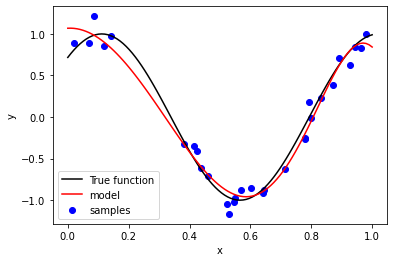

In [87]:
# Fit 15-degree polynomial with L1 regularization 
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
lasso = Lasso(alpha=0.0001, max_iter = 1e4)
lasso.fit(X.T, train_y)

# Plot fitted curve and sampled data points
plt.figure()
plt.scatter(train_x, train_y, c='b', label='samples')
plt.plot(test_x, model(test_x), c='k', label='True function')
plt.plot(test_x, lasso.predict(test_X.T), c='r', label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
w = np.concatenate((np.array([lasso.intercept_]), lasso.coef_))
print("w: ", w )

Decreasing the alpha value increases the polynomial degree. Decreasing max_iter decreases the polynomial degree. Based on analysis, Lasso reduces the coefficients of the features to prevent overfitting.

## P5. Ridge regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L2 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

w:  [  1.05451815   0.18540835 -12.58679744   2.63754965   8.86537084
   7.85860742   4.06314768   0.11573308  -2.82296512  -4.4190787
  -4.73235933  -3.9766228   -2.40068539  -0.235759     2.32330082
   5.12086941]


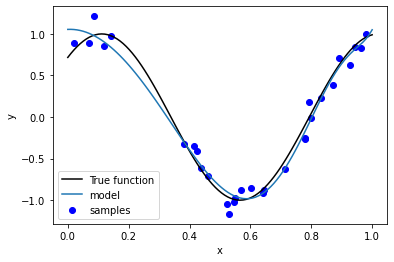

In [97]:
# Fit 15-degree polynomial with L2 regularization
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
ridge = Ridge(alpha=0.0003, max_iter = 1e4)
ridge.fit(X.T, train_y)

# Plot fitted curve and sampled data points and compare to L1 regularization from P4

plt.figure()
plt.scatter(train_x, train_y, c='b', label='samples')
plt.plot(test_x, model(test_x), c='k', label='True function')
plt.plot(test_x, ridge.predict(test_X.T), label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

w = np.concatenate((np.array([ridge.intercept_]), ridge.coef_))
print("w: ", w )

Ridge follows a similar trend of decreasing the alpha value increases the polynomial degree. Decreasing max_iter decreases the polynomial degree. Ridge is more sensitive and instead of reducing the features, it appears to tweak the features.